# Nobel Prize Data Exploration

The Nobel Prize is perhaps the world's most well known scientific award. Every year it is given to scientists and scholars in chemistry, literature, physics, medicine, economics, and peace. The first Nobel Prize was handed out in 1901.

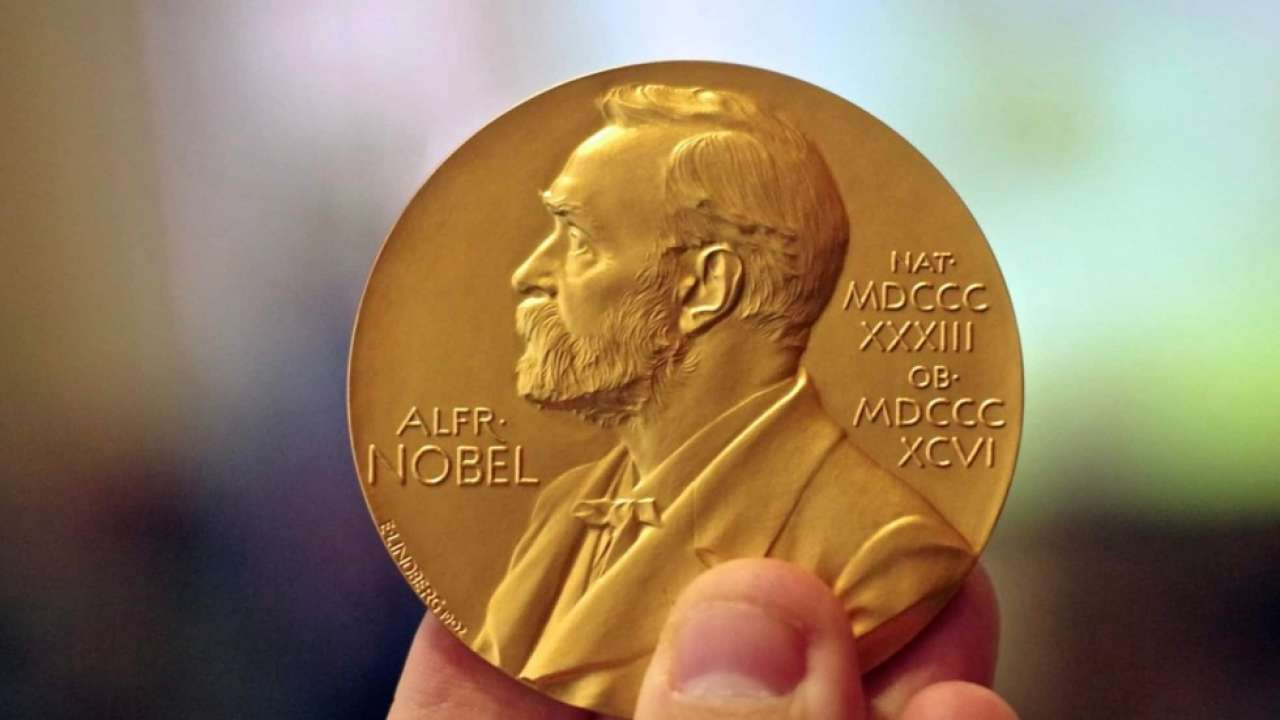

From 1901 to 2016, over the span of 100 years, we have data on all nobel prize winners.

The dataset used in this project is from The Nobel Foundation on Kaggle.


# Analysis

All the necessary imports for the analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('/content/Nobel Prize Data.csv')
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
print(df.columns)

Index(['Year', 'Category', 'Prize', 'Motivation', 'Prize Share', 'Laureate ID',
       'Laureate Type', 'Full Name', 'Birth Date', 'Birth City',
       'Birth Country', 'Sex', 'Organization Name', 'Organization City',
       'Organization Country', 'Death Date', 'Death City', 'Death Country'],
      dtype='object')


**Columns information**

'Year' : The Year in which the Award was given,

'Category' :  The Category of the Award,

'Prize' : The Nobel Prize Title,

'Motivation' :  The motivation of work which led to the Prize,

'Prize Share' : The share of the Nobel Prize shown in Fractions

'Laureate ID' : The ID of winner/winners of nobel prize,

'Laureate Type' : The Type of winner/winners of nobel prize, whether 'Individual' or 'Orgnization',

'Full Name' : The Full name of Laureate,

'Birth Date' : The Birth date of Laureate,

'Birth City' : The Birth City of Laureate,

'Birth Country' :  The Birth Country of Laureate,

'Sex' : The Sex of Laureate, 'Male' or 'Female'

'Organization Name' :  The name of winner Organization,

'Organization City' : The City in which the Organization is located,

'Organization Country' :  The Country in which Organization is located,

'Death Date' : The Death Date of Laureate,

'Death City' : The Death City of Laureate,

'Death Country' : The Death Country of Laureate.




### Most Nobel Prizes

Overall, How many Prizes were won by each category, regardless of different 'Laureate Type'?

In [4]:
most_prizes_by_cat = df.pivot_table('Year', 'Category', aggfunc = len).reset_index().sort_values('Year', ascending = False).rename(columns = {'Year':'count'})
most_prizes_by_cat

,Category,count
3,Medicine,227
5,Physics,222
0,Chemistry,194
4,Peace,130
2,Literature,113
1,Economics,83


We see: 

1.   Medicine has won Nobel prize
2.   Economics has won the least Nobel Prize

The rest of the Data is visualized below.

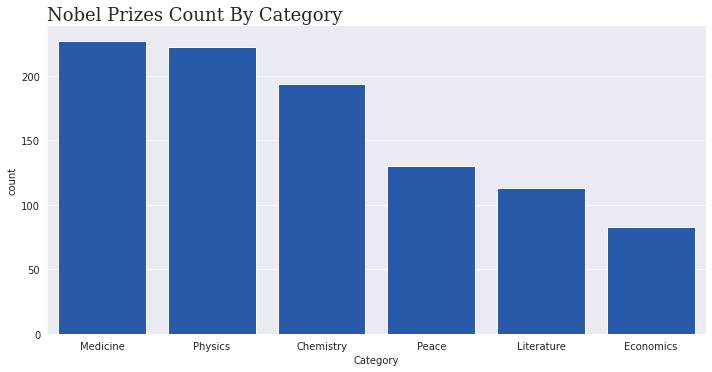

In [5]:
sns.set_style('darkgrid')
g1 = sns.catplot(data = most_prizes_by_cat, x = 'Category', y = 'count', kind = 'bar', aspect = 2, color = '#1355bf')
plt.title('Nobel Prizes Count By Category', loc = 'left', font = 'Serif', size = 18)
plt.show()

What is the status of Prize Share, what is the count of each fraction in that column?

In [6]:
most_prizes_by_prize_share = df.pivot_table('Year', 'Prize Share', aggfunc = len).reset_index().sort_values('Year', ascending = False).rename(columns = {'Year':'count', 'Prize Share':'prize_share'})
most_prizes_by_prize_share

,prize_share,count
0,1/1,351
1,1/2,328
2,1/3,225
3,1/4,65


We find that Most awards are individual based, 1 person won that award. The Number Decreases as we see the change of individuality into groups like 1/2 or group of 2, 1/3 or group of 3, 1/4 or group of 4.

The Data is visualized below.

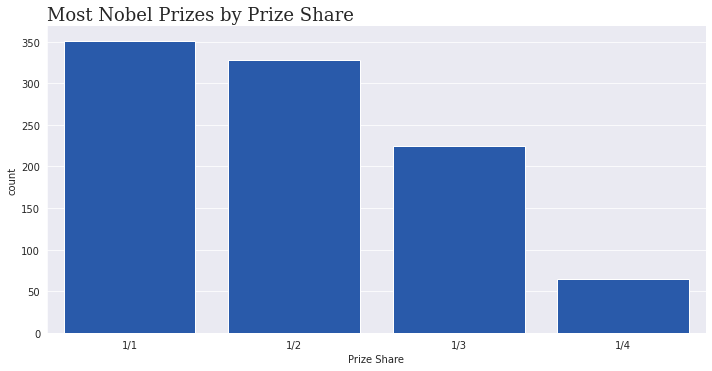

In [7]:
g2 = sns.catplot(data = most_prizes_by_prize_share, x = 'prize_share', y = 'count', kind = 'bar', aspect = 2, color = '#1355bf')
g2.set(xlabel = 'Prize Share')
plt.title('Most Nobel Prizes by Prize Share', font = 'Serif', size = 18, loc = 'left')
plt.show()

### USA dominance

We are to check how much each country has won and which country has won the most amount of Prizes.

In [8]:
american_dominance = df.pivot_table('Year', 'Birth Country', aggfunc = len).reset_index().sort_values('Year', ascending = False).rename(columns = {'Year':'count', 'Birth Country':'Country'})
american_dominance

,Country,count
115,United States of America,276
114,United Kingdom,88
43,Germany,70
39,France,53
104,Sweden,30
...,...,...
47,Gold Coast (Ghana),1
42,German-occupied Poland (Poland),1
40,Free City of Danzig (Poland),1
37,Faroe Islands (Denmark),1


We find that USA has most Prizes when it comes to individual countries, with a count of 276 which is a Massive difference from runner up UK with a count of 88. There's a 213.6% increase from UK to USA in prizes count.

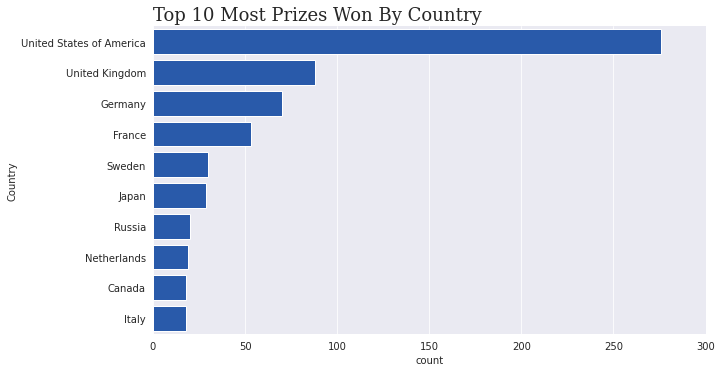

In [9]:
g3 = sns.catplot(data = american_dominance.head(10), x = 'count', y = 'Country',  kind = 'bar', aspect = 2, color = '#1355bf')
plt.title('Top 10 Most Prizes Won By Country', font = 'Serif', loc = 'left', size = 18)
plt.xticks(range(0, 320, 50))
plt.show()

### Typical gender of nobel prize winner

We look at the male to female proportion of prize receivers from 1901 to 2016. 

In [10]:
gender_counts = df.pivot_table('Year', 'Sex', aggfunc = len).reset_index().rename(columns = {'Year':'count'})

gender_counts['perc'] = [round(100 * (gender_counts['count'][i] / sum(gender_counts['count'])), 2) for i in range(len(gender_counts))]
gender_counts

,Sex,count,perc
0,Female,50,5.3
1,Male,893,94.7


The Data suggests that almost 95% winners are male and 5% winners are female. The data is visualized below.

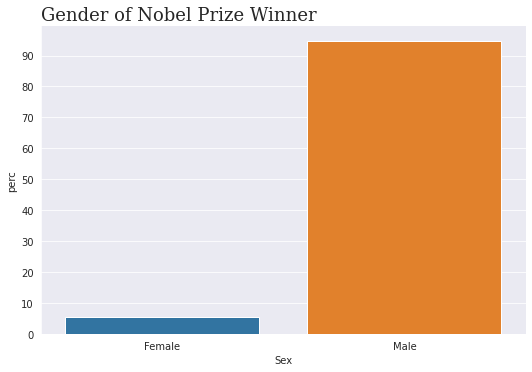

In [11]:
g4 = sns.catplot(data = gender_counts, x = 'Sex', y = 'perc',  kind = 'bar', aspect = 1.5)
plt.title('Gender of Nobel Prize Winner', font = 'Serif', loc = 'left', size = 18)
plt.yticks(range(0, 100, 10))
plt.show()

### First Woman to win nobel Prize

The first ever woman to win the Nobel Prize winner was in a group of 4 people. The details are following:

In [12]:
first_female = 0

for i in range(len(df)):
  if df.iloc[i]['Sex'] == 'Female':
    first_female += i
    break

ff_data = dict(df.iloc[first_female, :])

keys = list(ff_data.keys())
vals = list(ff_data.values())

print('Data of First Female Nobel Prize Winner with Prize Share ' + str(ff_data['Prize Share']))
for i in range(len(ff_data)):
  print(f'{keys[i]}:    {vals[i]}')


Data of First Female Nobel Prize Winner with Prize Share 1/4
Year:    1903
Category:    Physics
Prize:    The Nobel Prize in Physics 1903
Motivation:    "in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel"
Prize Share:    1/4
Laureate ID:    6
Laureate Type:    Individual
Full Name:    Marie Curie, née Sklodowska
Birth Date:    1867-11-07
Birth City:    Warsaw
Birth Country:    Russian Empire (Poland)
Sex:    Female
Organization Name:    nan
Organization City:    nan
Organization Country:    nan
Death Date:    1934-07-04
Death City:    Sallanches
Death Country:    France


The first ever woman to win the Nobel Prize winner was an Individual. The details are following:

In [13]:
for i in range(len(df)):
  if df.iloc[i]['Sex'] == 'Female' and df.iloc[i]['Prize Share'] == '1/1':
    print('Data of First Female Nobel Prize Winner with Prize Share ' + str(df.iloc[i]['Prize Share']))
    print(df.iloc[i])
    break

Data of First Female Nobel Prize Winner with Prize Share 1/1
Year                                                                 1905
Category                                                            Peace
Prize                                          The Nobel Peace Prize 1905
Motivation                                                            NaN
Prize Share                                                           1/1
Laureate ID                                                           468
Laureate Type                                                  Individual
Full Name               Baroness Bertha Sophie Felicita von Suttner, n...
Birth Date                                                     1843-06-09
Birth City                                                         Prague
Birth Country                            Austrian Empire (Czech Republic)
Sex                                                                Female
Organization Name                                  

### Laureates Repeat

We check if the Laureates ID is repeated or not, and if it is, we find that 63 IDs are repeated (in the data more than once). The ID 482 and 837 are repeated 3 times.

In [14]:
laureate = df.pivot_table('Year', ['Full Name', 'Laureate ID'], aggfunc = len).rename(columns = {'Year':'count', 'Laureate ID':'laureate_id'})
laureate_repeat = laureate[laureate['count'] > 1].sort_values('count', ascending = False)
laureate_repeat

,,count
Full Name,Laureate ID,
Jack W. Szostak,837,3
Comité international de la Croix Rouge (International Committee of the Red Cross),482,3
Abdus Salam,114,2
Robert J. Lefkowitz,878,2
Kurt Wüthrich,758,2
...,...,...
Ilya Prigogine,250,2
Il´ja Mikhailovich Frank,721,2
Isamu Akasaki,906,2


### How old are you when you get nobel prize?

To answer this question, 

1. Selecting the Data where the **Laureate Type** is **Individual**.
2. Making an **age_at_prize** column by subtracting the BirthYear from the year of award winning.
3. Finding the Central Tendency of the 'age_at_prize' column using Median.

In [15]:
#Prepping Data
individuals = df[df['Laureate Type'] == 'Individual']
individuals

birth_year = np.array([int(i.split('-')[0]) for i in individuals['Birth Date']])
age_at_prize = list(np.array(individuals['Year'] - birth_year))

individuals['age_at_prize'] = age_at_prize

<ipython-input-15-ffc787ab261d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individuals['age_at_prize'] = age_at_prize


Viola! The Question is answered. Typically you get Nobel prize at the age of **60** Years.

In [16]:
#Measuring Central Tendency using Median
median_age = round(np.median(age_at_prize))

print(f'The age at which you get Nobel Prize on Average: {median_age}')

The age at which you get Nobel Prize on Average: 60


### Age difference between category

Just out curiousity, I wanted to find the Typical age of a winners for each category and here are the results.

In [17]:
#Using Median to find central Tendency of data
age_difference = individuals.pivot_table('age_at_prize', 'Category', aggfunc = np.median).reset_index().sort_values('age_at_prize', ascending = False)
age_difference['age_at_prize'] = age_difference['age_at_prize'].apply(round)
age_difference

,Category,age_at_prize
1,Economics,67
2,Literature,67
4,Peace,62
0,Chemistry,57
3,Medicine,57
5,Physics,55


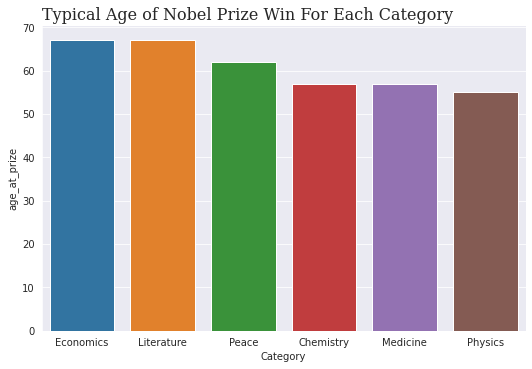

In [18]:
#@title
g5 = sns.catplot(data = age_difference, x = 'Category', y = 'age_at_prize',  kind = 'bar', aspect = 1.5)
plt.title('Typical Age of Nobel Prize Win For Each Category', font = 'Serif', loc = 'left', size = 16)
plt.show()

### Oldest and youngest winners

Finding the Youngest and Oldest winners of Nobel Prizes: 
- The Youngest age for Nobel Prize win is 17,
- The Oldest age for Nobel Prize win is 90.

In [19]:
min_age = individuals['age_at_prize'] == min(individuals['age_at_prize'])
max_age = individuals['age_at_prize'] == max(individuals['age_at_prize'])

individuals[(min_age) | (max_age)]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,age_at_prize
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,90
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,17


# Summary of Analysis

Following are the Insights from the dataset:


**Most Nobel Prizes**

- Medicine has won Nobel prize
- Economics has won the least Nobel Prize

**Prize Share Count**

- Individuals: 351
- Groups of 2: 328
- Groups of 3: 225
- Groups of 4: 65


**USA dominance**

We find that USA has most Prizes when it comes to individual countries, with a count of 276 which is a Massive difference from runner up UK with a count of 88. There’s a **213.6%** increase from UK to USA in prizes count.


**Typical gender of nobel prize winner**

The Data suggests that almost 95% winners are male and 5% winners are female.


**First Woman to win Nobel Prize**

1. Group of 4 Win: Marie Curie, née Sklodowska,
2. Individual Win: Baroness Bertha Sophie Felicita von Suttner.


**Laureates Repeat**

- The Laureate ID 482 and 837 are repeated 3 times.


**Typical Age of Getting Nobel Prize**
- Typically, you get Nobel prize at the age of 60 Years.


**Age Difference For Each Category**
- Economics : 67
- Literature : 67
- Peace : 62
- Chemistry : 57
- Medicine : 57
- Physics : 55


**Oldest and Youngest Winners**

- The Youngest age for Nobel Prize win is 17,
- The Oldest age for Nobel Prize win is 90.